In [32]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms

# Exemple 1 de classifieur linéaire

In [2]:
x1 = np.array([1, -1, -1], dtype=np.float32)
x2 = np.array([1, 1, -1], dtype=np.float32)
y  = np.array([0, 1, 2])

In [3]:
x1 = np.repeat(x1, 100)
x2 = np.repeat(x2, 100)
y = np.repeat(y, 100)

In [6]:
x1+=np.random.randn(len(x1))*0.05
x2+=np.random.randn(len(x2))*0.05

#génère un bruit aléatoire avec une loi normale centré réduite pour diversifier les données

In [7]:
index_shuffle = np.arange(len(x1))
np.random.shuffle(index_shuffle)
x1 = x1[index_shuffle ]
x2 = x2[index_shuffle]
y  = y [index_shuffle]

#Mélange le jeu de données

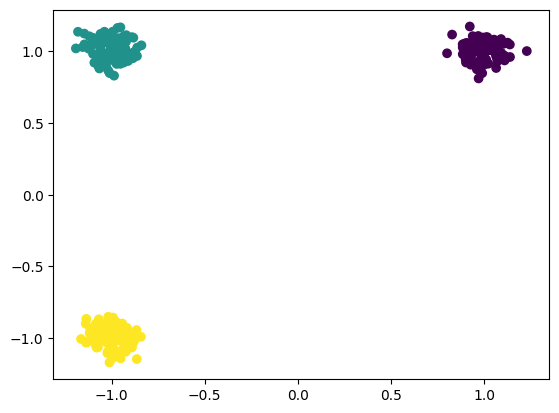

In [8]:
plt.scatter(x1, x2, c = y)

In [9]:
# Conversion en tensor
x1_torch = torch.from_numpy(x1).view(-1, 1)
x2_torch = torch.from_numpy(x2).view(-1, 1)
y = torch.from_numpy(y).view(-1, 1)

#Création d'une matrice avec les deux tenseurs
X = torch.hstack([x1_torch, x2_torch])

X_train = X[:250, :]
X_test  = X[250:, :]
y_train = y[:250, :]
y_test  = y[250:, :]

In [10]:
X_train.shape

torch.Size([250, 2])

In [11]:
class LinearClassifier(torch.nn.Module):
  def __init__(self, input_dim=2, output_dim=3):
    super(LinearClassifier, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim)

  def forward(self, x):
    x = self.linear(x)
    return x

In [12]:
model = LinearClassifier()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

all_loss = []
for epoch in range(10000):
  output = model(X_train)

  loss = criterion(output, y_train.view(-1))
  all_loss.append(loss.item())
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

La propagation avant (forward propagation) est le processus de calcul de la sortie du modèle à partir
des données d'entrée, tandis que la propagation arrière (backward propagation) est utilisée pour ajuster les poids
du modèle en fonction de l'erreur calculée, afin d'améliorer les performances du modèle au fil du temps lors de l'apprentissage.

In [13]:
model.forward(torch.tensor([1.,1.]))

tensor([ 4.6697, -0.0431, -2.9529], grad_fn=<AddBackward0>)

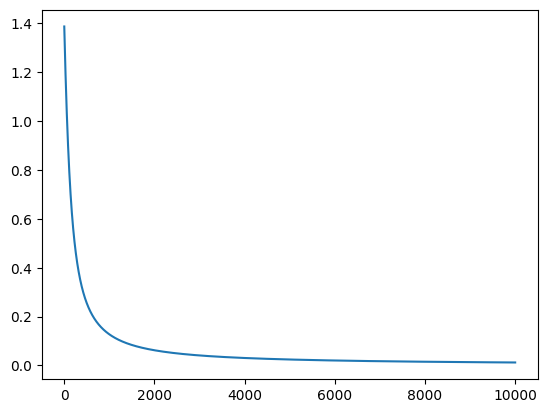

In [14]:
plt.plot(all_loss)

In [15]:
aa = model.parameters()

In [16]:
w, b = model.parameters()

#Ici w est le poids et b le biais

In [17]:
w = w.detach().numpy()
b = b.detach().numpy()

In [18]:
w

array([[ 3.1695352,  1.3593091],
       [-1.6814712,  2.1366425],
       [-0.6700202, -2.6821134]], dtype=float32)

Ici chaque ligne correspond au poid du neurone pour chaque classe de sortie. Chaque colonne représente le poids associé à une entrée spécifique. Ces poids sont utilisés pour faire des prédictions lors de la phase de test.

In [19]:
model.forward(torch.tensor([1.,0.], dtype = torch.float32))

tensor([ 3.3104, -2.1797, -0.2708], grad_fn=<AddBackward0>)

(-1.3129893124103547,
 1.350673633813858,
 -2.6685350461833157,
 2.4612602805595967)

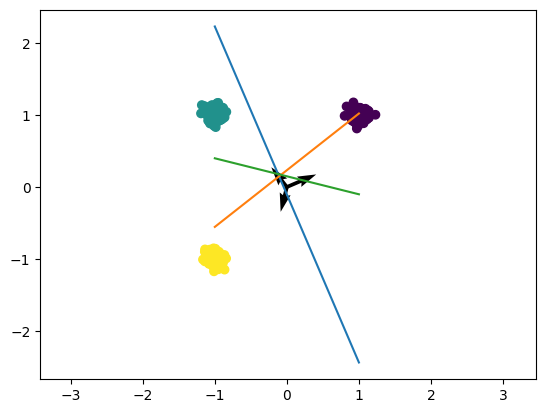

In [20]:
x1_fit = np.linspace(-1,1,100)
x2_fit = np.linspace(-1,1,100)

y1_fit =  ( - x1_fit*w[0,0]  - b[0]  ) /  w[0,1]  
y2_fit =  ( - x1_fit*w[1,0]  - b[1]  ) /  w[1,1]  
y3_fit =  ( - x1_fit*w[2,0]  - b[2]  ) /  w[2,1]  

plt.scatter(x1, x2, c=y)
plt.plot(x1_fit, y1_fit)
plt.plot(x1_fit, y2_fit)
plt.plot(x1_fit, y3_fit)

plt.quiver(np.array([0,0,0]),np.array([0,0,0]), w[:,0], w[:,1])

plt.axis('equal')

In [21]:
print(w[0,0])
print(w[0,1])
print(w[1,0])
print(w[1,1])
print(w[2,0])
print(w[2,1])

3.1695352
1.3593091
-1.6814712
2.1366425
-0.6700202
-2.6821134


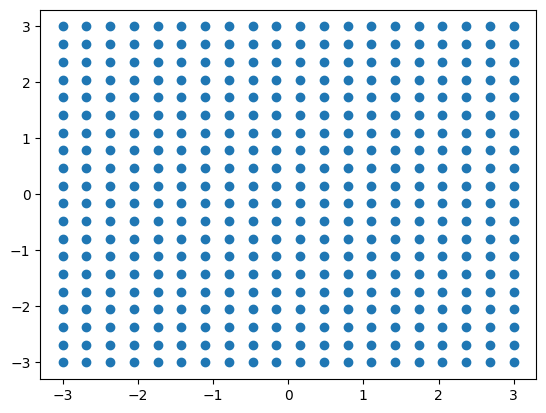

In [24]:
x1_fit = np.linspace(-3,3,20)
x2_fit = np.linspace(-3,3,20)

mesh_grid = np.meshgrid(x1_fit, x2_fit)
plt.scatter(mesh_grid[0], mesh_grid[1])

X = np.hstack([mesh_grid[0].reshape(-1, 1), mesh_grid[1].reshape(-1, 1)])
X = X.astype(np.float32)
X_torch = torch.from_numpy(X)

In [26]:
X = np.hstack([mesh_grid[0].reshape(-1, 1), mesh_grid[1].reshape(-1, 1)])
X = X.astype(np.float32)
X_torch = torch.from_numpy(X)

In [27]:
y_pred = model.forward(X_torch)
y_pred = torch.argmax(y_pred, axis = 1)

Ici on fait une prédiction pour chaque observation avec .forwzrd(X_torch) et on garde la prédiction avec la probabilité
maximale avec .argmax(y_pred, axis = 1). On a axis = 1 qui précise que argmax est appliqué sur les colonnes

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

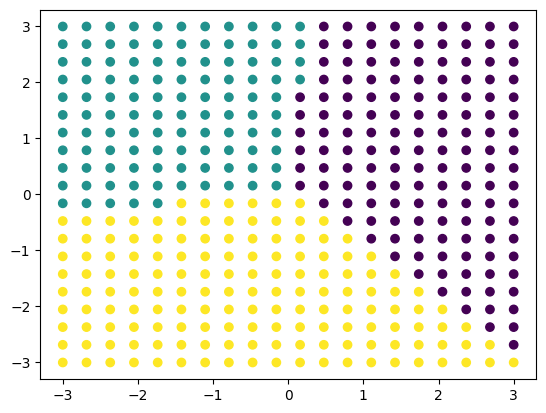

In [28]:
print(y_pred)
plt.scatter(X_torch[:,0], X_torch[:,1], c = y_pred.detach().numpy())

# Exemple avec la base MNIST

In [31]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize([0.1307], [0.3081])
])
#Ici la moyenne et la sd ont été calculé au préalable

In [33]:
trainset = torchvision.datasets.MNIST(root='./data', download=True, train=True , transform=transform)
testset  = torchvision.datasets.MNIST(root='./data', download=True, train=False, transform=transform)

7.6%

100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




21.9%

100.0%
100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [35]:
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testLoader  = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

In [37]:
classes = np.arange(0, 10, 1)
dataiter = iter(trainLoader)
images, labels = next(dataiter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


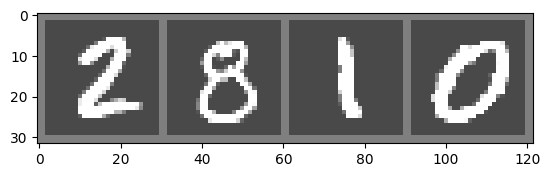

In [39]:
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0))) #Cette ligne utilise la fonction plt.imshow de Matplotlib pour afficher 
  #l'image. np.transpose(npimg, (1, 2, 0)) transpose les dimensions de l'array NumPy npimg 
  #pour qu'elles correspondent au format attendu par imshow (largeur x hauteur x canaux).
  plt.show()

imshow(torchvision.utils.make_grid(images))

In [40]:
print(labels)

tensor([2, 8, 1, 0])


In [41]:
class LinearClassifier(torch.nn.Module):
  def __init__(self, input_dim=28*28, output_dim=10):
    super(LinearClassifier, self).__init__()
    self.linear = torch.nn.Linear(input_dim, output_dim)

  def forward(self, x):
    x = self.linear(x)
    return x

In [42]:
model  = LinearClassifier()
criterion = torch.nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [43]:
all_loss = []

for epoch in range(10):

  temp_loss = []

  for images, labels in trainLoader:
    output = model(images.view(images.shape[0], -1))

    loss = criterion(output, labels)
    loss.backward()

    temp_loss.append(loss.item())

    optimizer.step()
    optimizer.zero_grad()
  
  all_loss.append(np.mean(temp_loss))
  print(f"Epoch: {epoch}, loss: {np.mean(temp_loss)}")

Epoch: 0, loss: 0.4246454495011363
Epoch: 1, loss: 0.317318549393488
Epoch: 2, loss: 0.2997845774018914
Epoch: 3, loss: 0.2907658843341342
Epoch: 4, loss: 0.2843772102732827
Epoch: 5, loss: 0.2803206742986416
Epoch: 6, loss: 0.2762460346574313
Epoch: 7, loss: 0.2738714421453692
Epoch: 8, loss: 0.2712417221707816
Epoch: 9, loss: 0.26891256579924083


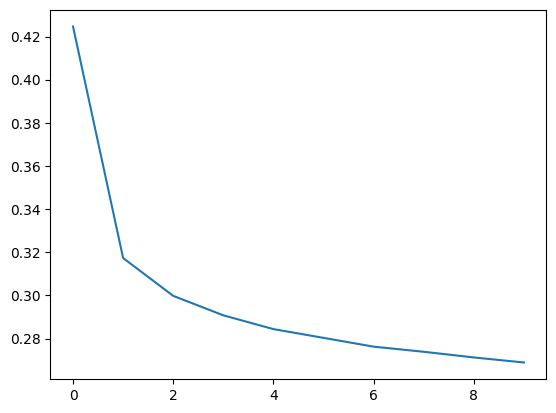

In [44]:
plt.plot(all_loss)

In [45]:
correct, total = 0, 0

with torch.no_grad():

  for images, labels in testLoader:
    output = model(images.view(images.shape[0], -1))

    _, predicted = torch.max(output.data, 1)
    # le _ permet de ne pas prendre en compte le score maximal calculé mais seulement l'indice
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

In [46]:
100 * correct / total

92.19

In [47]:
class_correct = list(0. for i in range(10))
class_total   = list(0. for i in range(10))

In [48]:
with torch.no_grad():
  for images, labels in testLoader:
    output = model(images.view(images.shape[0], -1))
    _, predicted = torch.max(output.data, 1)

    c = (predicted == labels).squeeze()

    for i in range(4): #4 pour le nombre de batch
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

In [49]:
for i in range(10):
  print(f"Accuracy of {classes[i]}: {100 * class_correct[i] / class_total[i]}")

Accuracy of 0: 97.55102040816327
Accuracy of 1: 97.62114537444934
Accuracy of 2: 88.75968992248062
Accuracy of 3: 90.6930693069307
Accuracy of 4: 93.17718940936864
Accuracy of 5: 86.21076233183857
Accuracy of 6: 94.88517745302714
Accuracy of 7: 92.21789883268482
Accuracy of 8: 88.19301848049281
Accuracy of 9: 91.47670961347869


In [50]:
w, b = model.parameters()

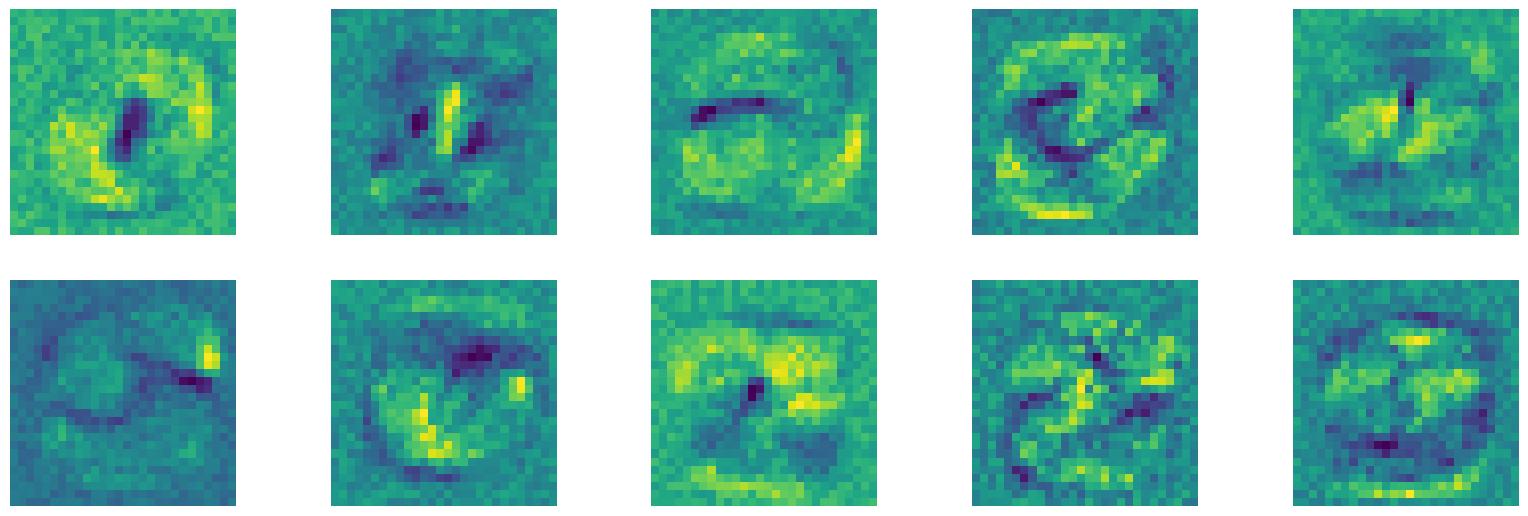

In [51]:
plt.figure(figsize=(20, 17))
for i, data in enumerate(w):
  plt.subplot(5, 5, i+1)
  plt.imshow(data.detach().reshape(28, 28))
  plt.axis('off')

In [52]:
idx_0 = testset.train_labels==0
idx_1 = testset.train_labels==1
idx_8 = testset.train_labels==8
zero = testset.train_data[idx_0]
one = testset.train_data[idx_1]
eight = testset.train_data[idx_8]

zero = zero[15].clone()
one = one[20].clone()
eight = eight[24].clone()

zero = transform(transforms.ToPILImage()(zero))
one = transform(transforms.ToPILImage()(one))
eight = transform(transforms.ToPILImage()(eight))

three_class_data = torch.stack([zero, one, eight])

/Users/lorenzomathieu/Documents/Stage/RL_online_transfer/env/lib/python3.11/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/lorenzomathieu/Documents/Stage/RL_online_transfer/env/lib/python3.11/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


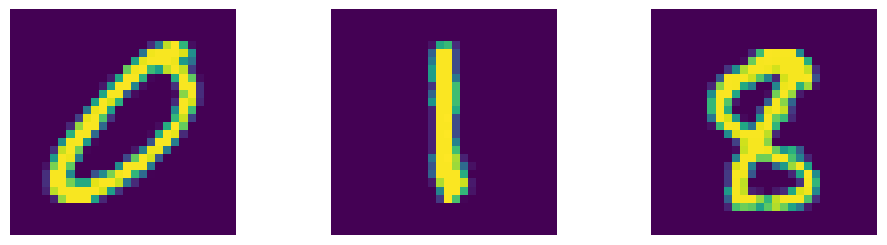

In [53]:
plt.figure(figsize=(20, 17))
for i, data in enumerate(three_class_data):
    plt.subplot(5, 5, i+1)
    plt.imshow(data.cpu().detach().reshape(28, 28))
    plt.axis('off')
plt.show()

In [54]:
imgs = torch.stack([img_t for img_t, _ in trainset], dim=3)
min_ = imgs.view(1, -1).min(dim=1).values[0]
max_ = imgs.view(1, -1).max(dim=1).values[0]

In [55]:
changeup = np.linspace(min_, max_, 256)

In [56]:
w_class = torch.vstack([w[0], w[1], w[8]])
b_class = torch.vstack([b[0], b[1], b[8]])

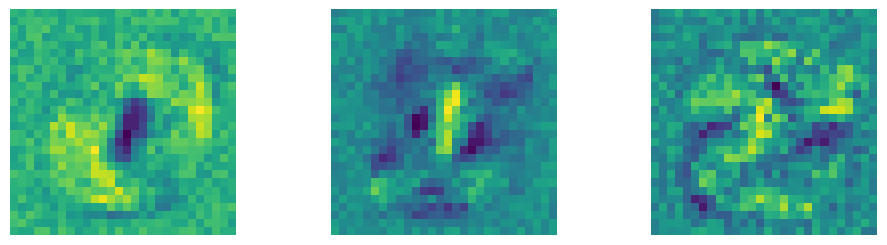

In [57]:
plt.figure(figsize=(20, 17))
for i, data in enumerate(w_class):
    plt.subplot(5, 5, i+1)
    plt.imshow(data.cpu().detach().reshape(28, 28))
    plt.axis('off')
plt.show()

In [58]:
data_0 = np.zeros((256))
data_1 = np.zeros((256))
data_8 = np.zeros((256))

for i in range(len(changeup)):
  reshaped = eight.reshape(28, 28, 1)
  reshaped[12, 15] = changeup[i]

  data_0[i] = ((torch.sum(w_class[0] * reshaped.reshape(-1)) + b_class[0]).cpu().detach().numpy())
  data_1[i] = ((torch.sum(w_class[1] * reshaped.reshape(-1)) + b_class[1]).cpu().detach().numpy())
  data_8[i] = ((torch.sum(w_class[2] * reshaped.reshape(-1)) + b_class[2]).cpu().detach().numpy())

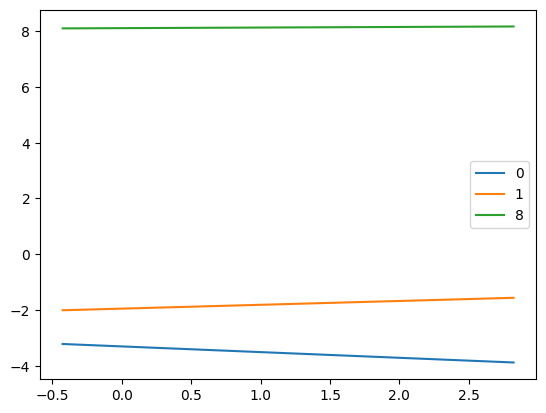

In [59]:
plt.plot(changeup, data_0)
plt.plot(changeup, data_1)
plt.plot(changeup, data_8)

plt.legend(['0', '1', '8'])

In [60]:
data_0 = np.zeros((256, 256))
data_1 = np.zeros((256, 256))
data_8 = np.zeros((256, 256))

for i in range(len(changeup)):
  reshaped = eight.reshape(28, 28, 1).float()

  reshaped[12, 15] = changeup[i]
  for j in range(len(changeup)):
    reshaped[17, 14] = changeup[j]

    data_0[i, j] = ((torch.sum(w_class[0] * reshaped.reshape(-1)) + b_class[0]).cpu().detach().numpy())
    data_1[i, j] = ((torch.sum(w_class[1] * reshaped.reshape(-1)) + b_class[1]).cpu().detach().numpy())
    data_8[i, j] = ((torch.sum(w_class[2] * reshaped.reshape(-1)) + b_class[2]).cpu().detach().numpy())

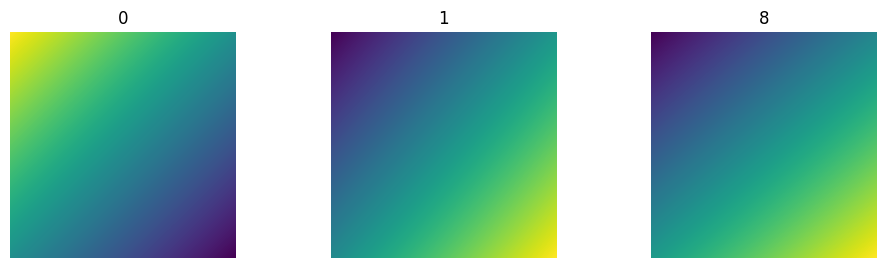

In [61]:
combined = np.array([data_0, data_1, data_8])
class_names = ['0', '1', '8']

plt.figure(figsize=(20, 17))
for i, data in enumerate(combined):
  
    plt.subplot(5, 5, i+1)
    plt.imshow(data)
    plt.title(class_names[i])
    plt.axis('off')

plt.show()

In [63]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [64]:
import torch
import math
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

True
True


In [65]:
dtype = torch.float
device = torch.device("mps")

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

# Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

99 251.980712890625
199 180.6671142578125
299 130.28298950195312
399 94.67742919921875
499 69.51339721679688
599 51.727317810058594
699 39.15508270263672
799 30.267662048339844
899 23.984634399414062
999 19.54249382019043
1099 16.401702880859375
1199 14.180902481079102
1299 12.610525131225586
1399 11.50002670288086
1499 10.71469497680664
1599 10.159290313720703
1699 9.766484260559082
1799 9.488662719726562
1899 9.292160034179688
1999 9.153169631958008
Result: y = 0.019349973648786545 + 0.8554291725158691 x + -0.00333819049410522 x^2 + -0.09314382821321487 x^3
